In [19]:
import pandas as pd
import numpy as np
import statsmodels.graphics.gofplots
#%load_ext rpy2.ipython

filename = 'SP500.csv'
sp500data = pd.read_csv(filename, parse_dates=['date'], index_col=['date'])
sp500data.head(50)

,secid,low,high,open,close
date,,,,,
1996-01-02,108105,613.17,620.74,615.93,620.73
1996-01-03,108105,619.56,623.25,620.73,621.32
1996-01-04,108105,613.96,624.49,621.32,617.70
1996-01-05,108105,612.02,617.70,617.70,616.71
1996-01-08,108105,616.49,618.46,616.71,618.46
1996-01-09,108105,608.21,619.15,618.46,609.45
1996-01-10,108105,597.29,609.45,609.45,598.48
1996-01-11,108105,597.54,602.71,598.48,602.69
1996-01-12,108105,597.46,604.80,602.69,601.81


In [20]:
sp500data.drop(columns=["secid"], inplace=True)

In [21]:
# sp500data['date'] = pd.to_datetime(sp500data['date'], format='%Y%m%d')
# sp500data

In [22]:
sp500data.loc['1996']

,low,high,open,close
date,,,,
1996-01-02,613.17,620.74,615.93,620.73
1996-01-03,619.56,623.25,620.73,621.32
1996-01-04,613.96,624.49,621.32,617.70
1996-01-05,612.02,617.70,617.70,616.71
1996-01-08,616.49,618.46,616.71,618.46
...,...,...,...,...
1996-12-24,746.92,751.03,746.92,751.03
1996-12-26,751.02,757.07,751.03,755.82
1996-12-27,754.82,758.75,755.82,756.79


In [23]:
closePrices = sp500data['close']
closePrices.head(10)

date
1996-01-02    620.73
1996-01-03    621.32
1996-01-04    617.70
1996-01-05    616.71
1996-01-08    618.46
1996-01-09    609.45
1996-01-10    598.48
1996-01-11    602.69
1996-01-12    601.81
1996-01-15    599.82
Name: close, dtype: float64

In [24]:
#log returns (continously coumpunded)
logged_prices = np.log(closePrices)
y = np.diff(logged_prices)
y

array([ 0.00095004, -0.00584334, -0.00160401, ...,  0.00164802,
       -0.00927371, -0.00507594])

In [25]:
np.mean(y)

0.0002349295619531337

In [26]:
np.std(y)

0.012312425097373696

In [27]:
np.min(y)

-0.09469514468085727

In [28]:
np.max(y)

0.10957195934756658

In [29]:
import scipy.stats

scipy.stats.skew(y)

-0.2315931867273547

In [30]:
scipy.stats.kurtosis(y)

7.639350118663106

In [31]:
%matplotlib inline

Text(0, 0.5, 'Returns')

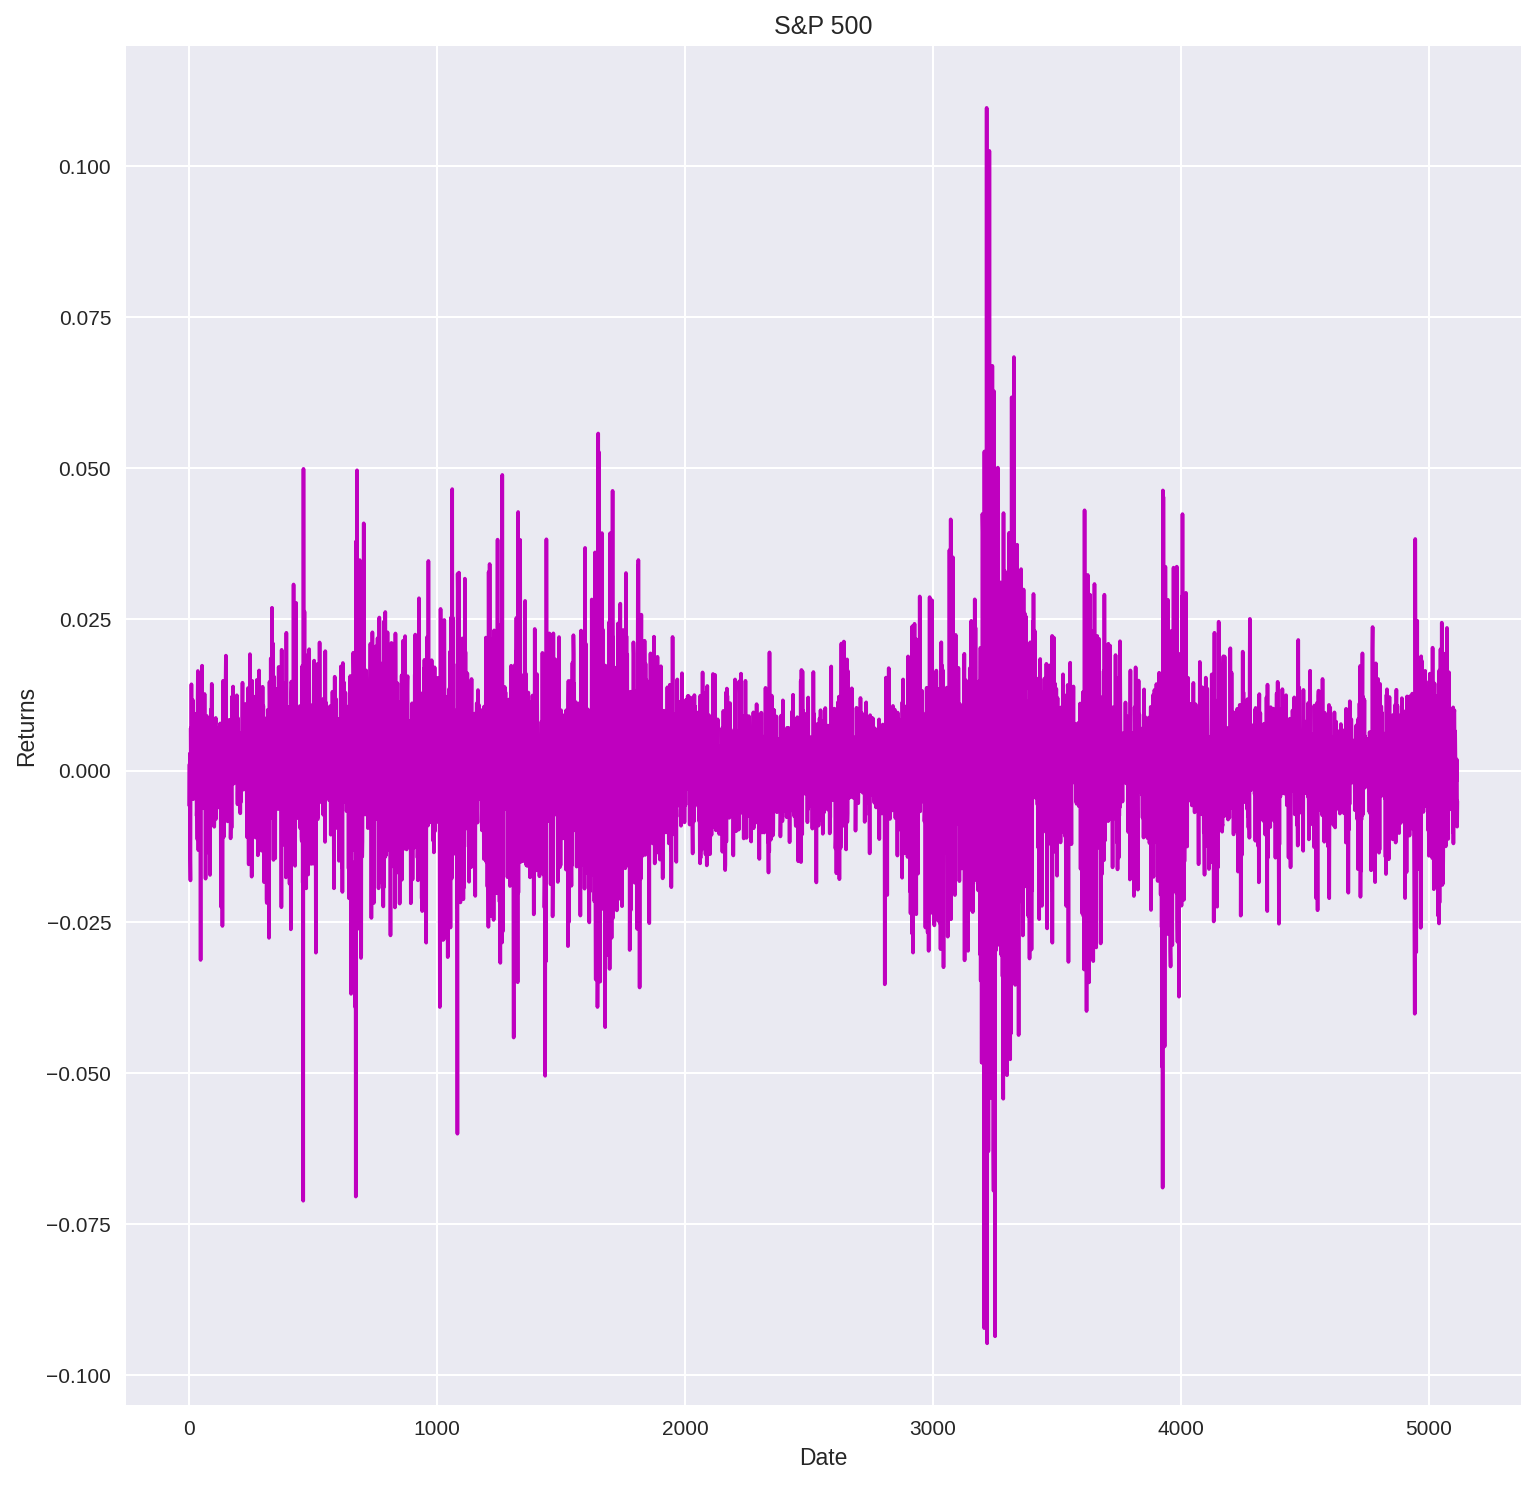

In [32]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.figure(figsize=(12,12), dpi=150)
plt.plot(y, color='m')
plt.title('S&P 500')
plt.xlabel('Date')
plt.ylabel('Returns')

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.stattools import acf
acf(y, nlags=20)

array([ 1.        , -0.06455887, -0.04559759,  0.00959889, -0.0100561 ,
       -0.04640306,  0.00447692, -0.0309776 ,  0.01771719, -0.00597668,
        0.0311502 , -0.02766026,  0.04139565,  0.01678352, -0.02501286,
       -0.03510396,  0.03926974,  0.00589837, -0.04198281,  0.01079654,
        0.01830715])

# Test for normality

((array([-3.64164544, -3.40668696, -3.27720799, ...,  3.27720799,
          3.40668696,  3.64164544]),
  array([-0.09469514, -0.09353656, -0.09218962, ...,  0.06836638,
          0.10245733,  0.10957196])),
 (0.011836001164060087, 0.00023492956195313335, 0.9606772354655699))

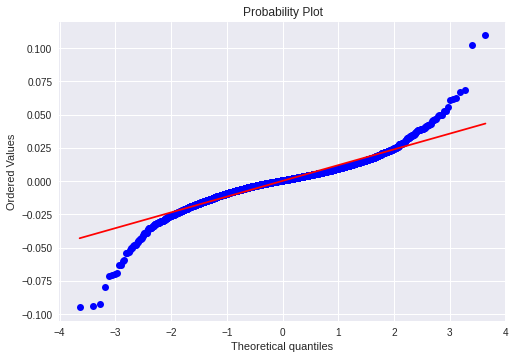

In [34]:
import scipy
scipy.stats.probplot(y, dist="norm", plot=plt)

In [35]:
jbtest = scipy.stats.jarque_bera(y)
jbtest.pvalue

0.0

Observation of fat tails => returns are not normally distributed

# Test for autocorrelation

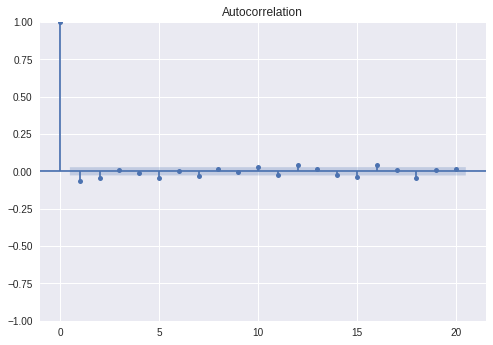

In [36]:
acf_func = plot_acf(y, lags=20, alpha=0.05)

In [38]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljungboxtest = acorr_ljungbox(y, lags=20, boxpierce=False, return_df=True)
ljungboxtest

,lb_stat,lb_pvalue
1,21.339385,3.847451e-06
2,31.986665,1.132880e-07
3,32.458599,4.189092e-07
4,32.976664,1.207694e-06
5,44.009899,2.305532e-08
6,44.112618,7.021540e-08
7,49.031601,2.236840e-08
8,50.640965,3.076866e-08
9,50.824141,7.536368e-08
10,55.801012,2.236824e-08
